In [3]:
import arxiv
import requests
import io
import PyPDF2
import time
import pandas as pd
import matplotlib.pyplot as plt
import random
import string as st

import logging
logger = logging.getLogger("PyPDF2")
logger.setLevel(logging.ERROR)

In [18]:
# Implementing KMP Algorithm
def KMP(p, t):
    M = len(p)  # length of pattern is M
    N = len(t)  # length of text is N
    # initialization
    pi = [0] * M
    j = 0
    # calculate pi table for the pattern
    PiTable(p, M, pi)
    i = 0  # index for text to iterate over
    while (N - i) >= (M - j):
        if p[j] == t[i]:
            i += 1
            j += 1
        if j == M:
            print("Pattern matched at index " + str(i - j))
            j = pi[j - 1]
        # mismatch after j matches
        elif i < N and p[j] != t[i]:
            # Do not match pi[0..pi[j-1]] characters,
            # they will match anyway
            if j != 0:
                j = pi[j - 1]
            else:
                i += 1

def PiTable(pat, M, pi):
    sub = 0  # length of the previous longest prefix suffix
    pi[0] = 0  # lps[0] is always 0
    i = 1
    # the loop calculates lps[i] for i = 1 to M-1
    while i < M:
        if pat[i] == pat[sub]:
            sub += 1
            pi[i] = sub
            i += 1
        else:
            if sub != 0:
                sub = pi[sub - 1]
                # Also, note that we do not increment i here
            else:
                pi[i] = 0
                i += 1

def bigO_time(length):
    start_time = time.time()
    for i in range(0, length):
        pass
    return time.time() - start_time

In [5]:
# Code to extract papers from Arxiv database
# Method to extract papers found based on a query, and extract the text and return the concatenated string
def extract_papers(query, volume):
    search = arxiv.Search(
        query = query,
        max_results = volume,
    )
    string = ""
    for result in search.results():
        # Get binary data of the PDF
        response = requests.get(result.pdf_url)
        pdf_file = io.BytesIO(response.content)
        # Read the PDF file
        try:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            num_pages = len(pdf_reader.pages)
            # Iterate through each page and extract the text
            for page_number in range(num_pages):
                pdf_page = pdf_reader.pages[page_number]
                text = pdf_page.extract_text()
                string += text
        except:
            print("PDF with Invalid formatting found. Skipping..")
    return string

In [6]:
print("STARTED: Extracting papers")
all_papers_string = extract_papers(query="Robot", volume=100)
print("FINISH: Extracted all the papers")

STARTED: Extracting papers
PDF with Invalid formatting found. Skipping..
PDF with Invalid formatting found. Skipping..
FINISH: Extracted all the papers


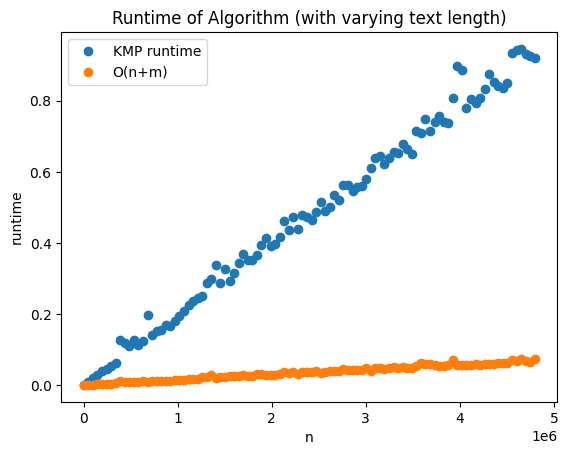

In [19]:
# Plotting a graph keeping the length of pattern constant, and length of text varying

t_vals = []
rt_vals = []
nrt_vals = []

gap_size = int(len(all_papers_string)/100)
p = " ^_^ This text pattern never exists in research papers ^_^ "

for N in range(1000, len(all_papers_string), gap_size):
    t = all_papers_string[0:N]
    t_vals.append(len(t))
    # Running the KMP algortihm
    start_time = time.time()
    KMP(p, t)
    runtime = time.time() - start_time
    rt_vals.append(runtime)
    # Plotting the function O(n)
    nrt_vals.append(bigO_time(len(t) + len(p)))

data = {"n" : t_vals, "runtime" : rt_vals, "O(n+m)" : nrt_vals}
df = pd.DataFrame(data)
plt.plot(df['n'], df['runtime'], 'o', label='KMP runtime')
plt.plot(df['n'], df['O(n+m)'], 'o', label='O(n+m)')
plt.xlabel('n')
plt.ylabel('runtime')
plt.legend()
plt.title("Runtime of Algorithm (with varying text length)")
plt.savefig('Plots/KMP_manipulating_text.png')
plt.show()

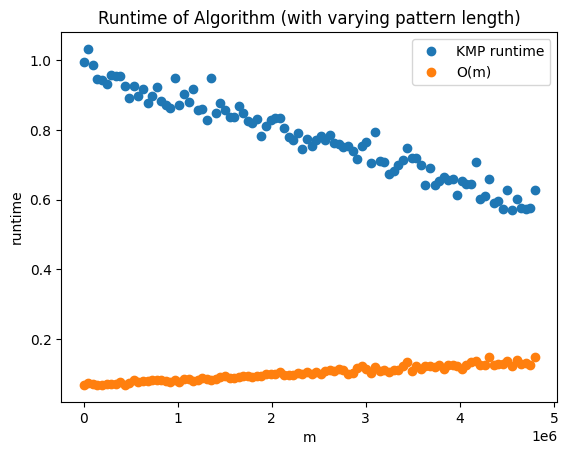

In [20]:
# Plotting a graph keeping the length of text constant, and length of pattern varying

def get_random_pattern(length):
    # choose from all lowercase letter
    letters = st.ascii_lowercase
    result_str = ''.join(random.choice(letters) for i in range(length))
    return result_str

p_vals = []
rt_vals = []
nrt_vals = []

gap_size = int(len(all_papers_string)/100)

for N in range(1000, len(all_papers_string), gap_size):
    p_vals.append(N)
    p = get_random_pattern(N)
    start_time = time.time()
    KMP(p, all_papers_string)
    runtime = time.time() - start_time
    rt_vals.append(runtime)
    nrt_vals.append(bigO_time(N + len(all_papers_string)))

data = {"n" : t_vals, "runtime" : rt_vals, "O(m)" : nrt_vals}
df = pd.DataFrame(data)

plt.plot(df['n'], df['runtime'], 'o', label='KMP runtime')
plt.plot(df['n'], df['O(m)'], 'o', label='O(m)')
plt.xlabel('m')
plt.ylabel('runtime')
plt.legend()
plt.title("Runtime of Algorithm (with varying pattern length)")
plt.savefig('Plots/KMP_manipulating_pattern.png')
plt.show()

In [9]:
print("Total word extracted", len(all_papers_string))

Total word extracted 4844441
